<a href="https://colab.research.google.com/github/KachanVlg/ML-studying/blob/main/ML_LR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import sklearn.utils as sku
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

      x1  x2       y
0   2104   3  399900
1   1600   3  329900
2   2400   3  369000
3   1416   2  232000
4   3000   4  539900
5   1985   4  299900
6   1534   3  314900
7   1427   3  198999
8   1380   3  212000
9   1494   3  242500
10  1940   4  239999
11  2000   3  347000
12  1890   3  329999
13  4478   5  699900
14  1268   3  259900
15  2300   4  449900
16  1320   2  299900
17  1236   3  199900
18  2609   4  499998
19  3031   4  599000
20  1767   3  252900
21  1888   2  255000
22  1604   3  242900
23  1962   4  259900
24  3890   3  573900
25  1100   3  249900
26  1458   3  464500
27  2526   3  469000
28  2200   3  475000
29  2637   3  299900
30  1839   2  349900
31  1000   1  169900
32  2040   4  314900
33  3137   3  579900
34  1811   4  285900
35  1437   3  249900
36  1239   3  229900
37  2132   4  345000
38  4215   4  549000
39  2162   4  287000
40  1664   2  368500
41  2238   3  329900
42  2567   4  314000
43  1200   3  299000
44   852   2  179900
45  1852   4  299900
46  1203   3 

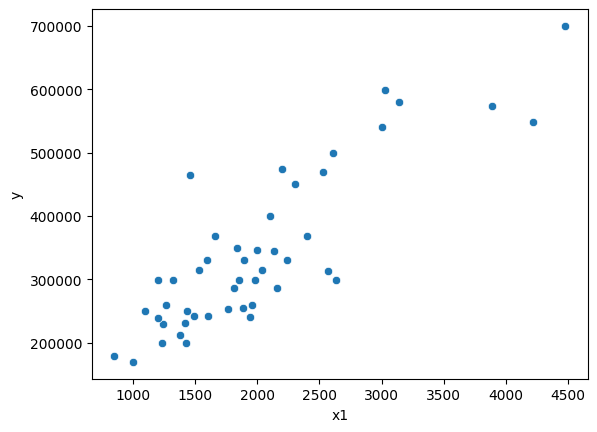

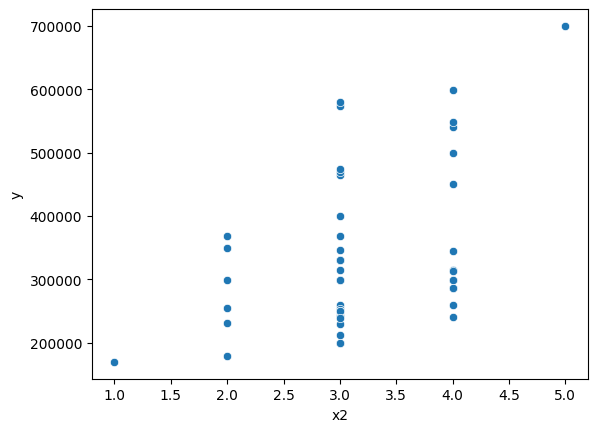

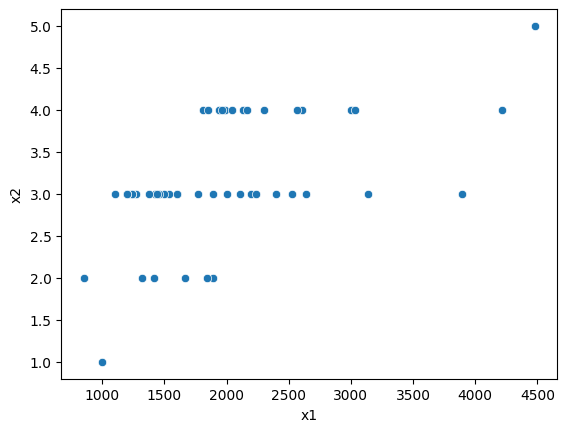

In [233]:
col_names = ['x1', 'x2','y']
path_dataset = "/content/drive/MyDrive/ML-studying/ex1data2.txt"

data_frame = pd.read_csv(path_dataset, names=col_names)

print(data_frame)
print('\n')

sb.scatterplot(data_frame, x='x1', y='y')
plt.show()
print('\n')

sb.scatterplot(data_frame, x='x2', y='y')
plt.show()
print('\n')

sb.scatterplot(data_frame, x='x1', y='x2')
plt.show()

In [234]:
#Разбиение на train и test

data = data_frame.values
np.random.shuffle(data)
data_train, data_test = np.split(data, [int(0.5 * len(data))])

In [235]:
#Стандартизация

mean_dev = np.mean(data_train[:, :-1], axis=0)
std_dev = np.std(data_train[:, :-1], axis=0)

def standard(data_to_std, mean_dev, std_dev):
  data_to_std[:] = (data_to_std - mean_dev)/std_dev

standard(data_train[:,:-1], mean_dev, std_dev)
standard(data_test[:,:-1], mean_dev, std_dev)

In [236]:
data_train = np.insert(data_train, 0, 1, axis=1)
data_test = np.insert(data_test, 0, 1, axis=1)

In [237]:
def calc_h(xs: np.ndarray, thetas: np.ndarray) -> np.ndarray:
  return xs @ thetas

def calc_J(h: np.ndarray, y: np.ndarray) -> float:
  return ((h-y)**2).mean()

def calc_grad(h: np.ndarray, y: np.ndarray, xs: np.ndarray) -> np.ndarray:
  return (xs.T @ (h-y))/len(xs)

def calc_reg_J(thetas: np.ndarray, lambd: float, h: np.ndarray, y: np.ndarray) -> float:
    m = len(y)
    return ((h - y) ** 2).mean() #+ (lambd / (2 * m)) * np.sum(thetas[1:] ** 2)

def calc_reg_grad(h: np.ndarray, y: np.ndarray, xs: np.ndarray, thetas: np.ndarray, lambd: float) -> np.ndarray:
    m = len(y)
    grad = (xs.T @ (h - y)) / m
    reg_term = (lambd / m) * np.copy(thetas)
    reg_term[0] = 0
    return grad + reg_term

def vis(history):
  for alpha, data in history.items():

    Js_train_vis = data["Js_train"]
    Js_test_vis = data["Js_test"]
    Js_train_reg_vis = data["Js_reg_train"]
    Js_test_reg_vis = data["Js_reg_test"]

    # --- Построение графика ---
    plt.figure(figsize=(8, 5))

    plt.plot(Js_train_vis, label="Train", linewidth=2)
    plt.plot(Js_test_vis, label="Test", linewidth=2)
    plt.plot(Js_train_reg_vis, label="Train_reg", linewidth=2)
    plt.plot(Js_test_reg_vis, label="Test_reg", linewidth=2)

    plt.title(f"Ошибка обучения и теста при α = {alpha}")
    plt.xlabel("Итерация")
    plt.ylabel("Ошибка J")
    plt.legend()
    plt.grid(True)

def learn_n_vis(thetas_base, epoch_num, data_train, data_test, lambd):

  for alpha in alphas:
    thetas = thetas_base
    thetas_reg = thetas_base
    Js_train = []
    Js_test = []
    Js_reg_train = []
    Js_reg_test = []

    for _ in range(epoch_num):
      np.random.shuffle(data_train)

      for i in range(0, len(data_train), batch_size):
        batch = data_train[i:i+batch_size]
        xs = batch[:, :-1]
        y  = batch[:, -1:]

        h = calc_h(xs, thetas)
        reg_h = calc_h(xs, thetas_reg)

        grad = calc_grad(h, y, xs)
        reg_grad = calc_reg_grad(reg_h, y, xs, thetas_reg, lambd)

        thetas = thetas - alpha*grad
        thetas_reg = thetas_reg - alpha*reg_grad

      Js_train.append(calc_J(calc_h(data_train[:, :-1], thetas), data_train[:, -1])*10e-6)
      Js_test.append(calc_J(calc_h(data_test[:, :-1], thetas), data_test[:, -1])*10e-6)

      Js_reg_train.append(calc_reg_J(thetas_reg, lambd, calc_h(data_train[:, :-1], thetas_reg), data_train[:, -1])*10e-6)
      Js_reg_test.append(calc_reg_J(thetas_reg, lambd, calc_h(data_test[:, :-1], thetas_reg), data_test[:, -1])*10e-6)

      history[alpha] = {
          "Js_train": Js_train,
          "Js_test": Js_test,
          "Js_reg_test": Js_reg_test,
          "Js_reg_train": Js_reg_train
      }

  vis(history)




/tmp/ipython-input-3196741218.py:12: RuntimeWarning: overflow encountered in square
  return ((h - y) ** 2).mean() #+ (lambd / (2 * m)) * np.sum(thetas[1:] ** 2)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-3196741218.py:5: RuntimeWarning: overflow encountered in square
  return ((h-y)**2).mean()
/tmp/ipython-input-3196741218.py:68: RuntimeWarning: overflow encountered in multiply
  thetas_reg = thetas_reg - alpha*reg_grad
/tmp/ipython-input-3196741218.py:16: RuntimeWarning: invalid value encountered in matmul
  grad = (xs.T @ (h - y)) / m
/tmp/ipython-input-3196741218.py:68: RuntimeWarning: invalid value encountered in subtract
  thetas_reg = thetas_reg - alpha*reg_grad
/tmp/ipython-input-3196741218.py:2: RuntimeWarning: overflow encountered in matmul
  return xs @ thetas
/tmp/ipython-input-3196741218.py:8: RuntimeWarning: overflow enc

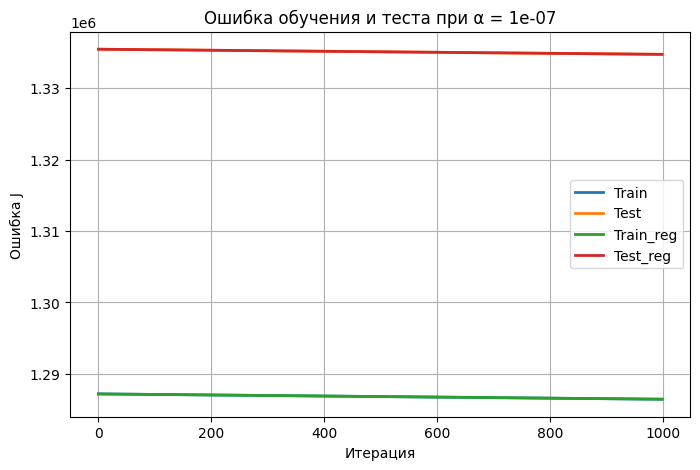

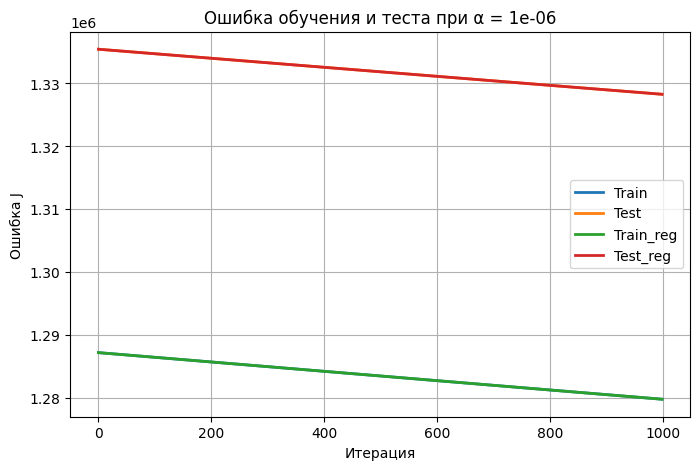

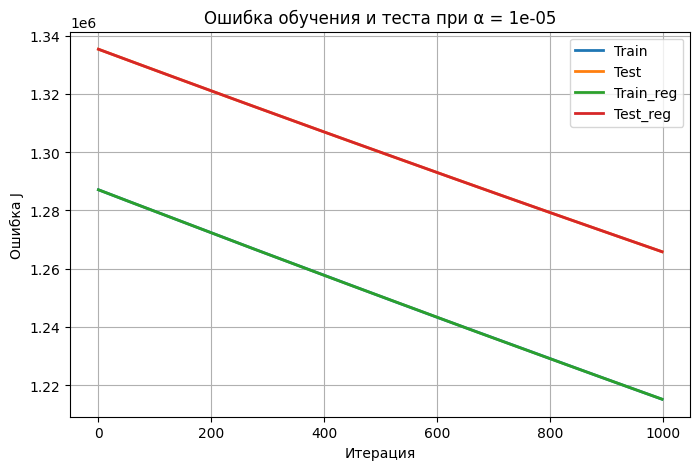

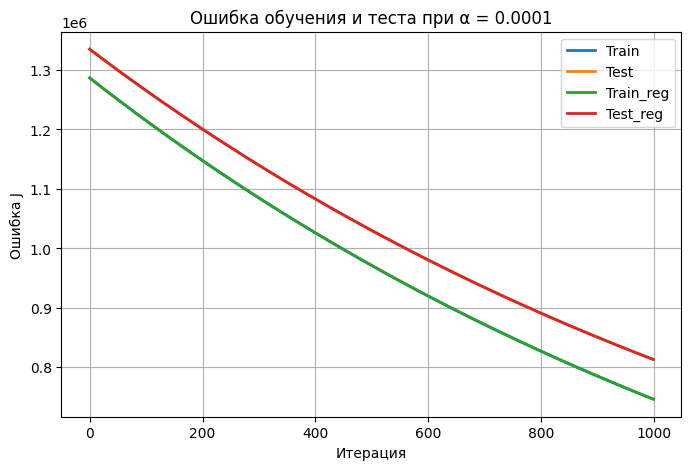

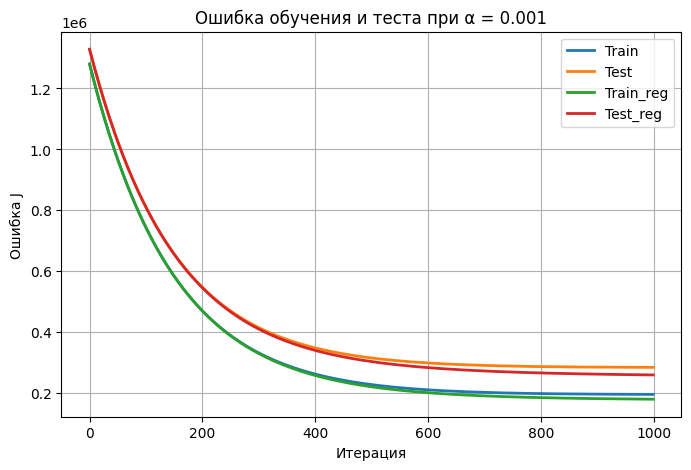

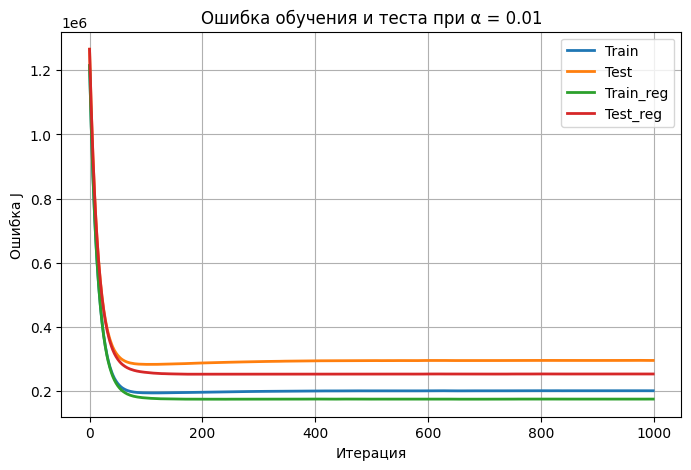

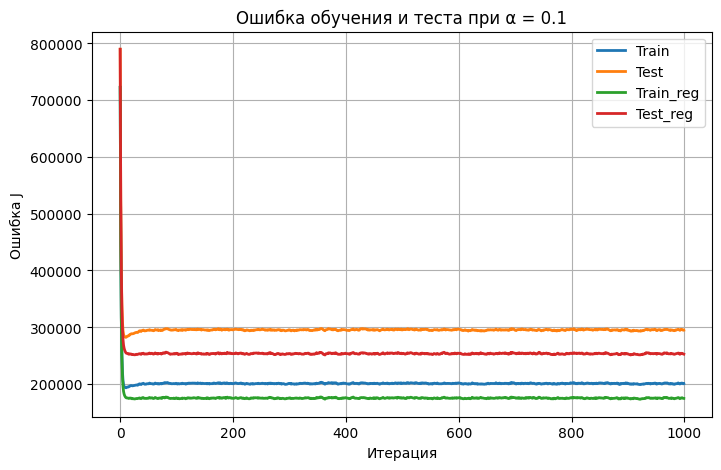

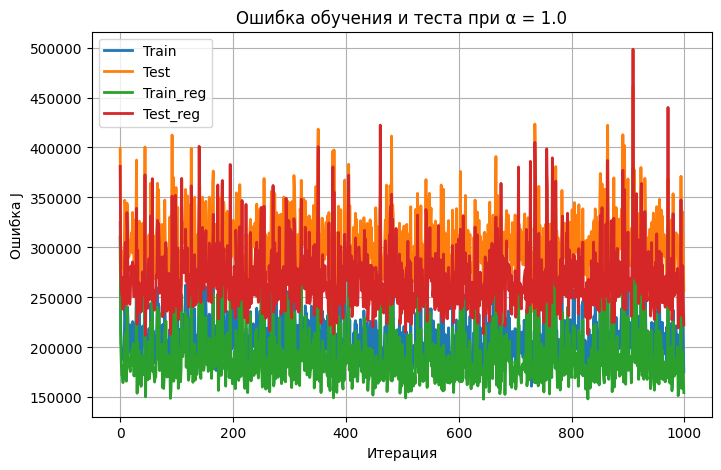

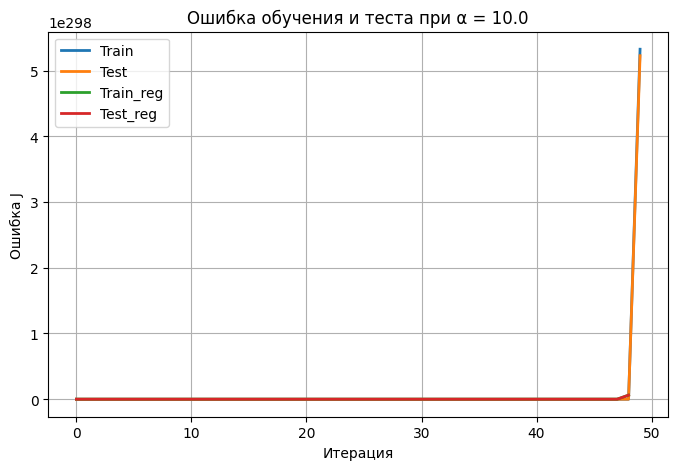

In [238]:
batch_size: int = 8
lambd: float =  1
epoch_num = 1000
thetas_base = np.random.rand(3,1)
alphas = np.logspace(-7, 1, num=9, base=10)
history = {}

learn_n_vis(thetas_base, epoch_num, data_train, data_test, lambd)

/tmp/ipython-input-3196741218.py:12: RuntimeWarning: overflow encountered in square
  return ((h - y) ** 2).mean() #+ (lambd / (2 * m)) * np.sum(thetas[1:] ** 2)
/tmp/ipython-input-3196741218.py:5: RuntimeWarning: overflow encountered in square
  return ((h-y)**2).mean()
/tmp/ipython-input-3196741218.py:16: RuntimeWarning: overflow encountered in matmul
  grad = (xs.T @ (h - y)) / m
/tmp/ipython-input-3196741218.py:2: RuntimeWarning: invalid value encountered in matmul
  return xs @ thetas
/tmp/ipython-input-3196741218.py:16: RuntimeWarning: invalid value encountered in matmul
  grad = (xs.T @ (h - y)) / m
/tmp/ipython-input-3196741218.py:8: RuntimeWarning: overflow encountered in matmul
  return (xs.T @ (h-y))/len(xs)
/tmp/ipython-input-3196741218.py:8: RuntimeWarning: invalid value encountered in matmul
  return (xs.T @ (h-y))/len(xs)
/tmp/ipython-input-3196741218.py:67: RuntimeWarning: invalid value encountered in subtract
  thetas = thetas - alpha*grad


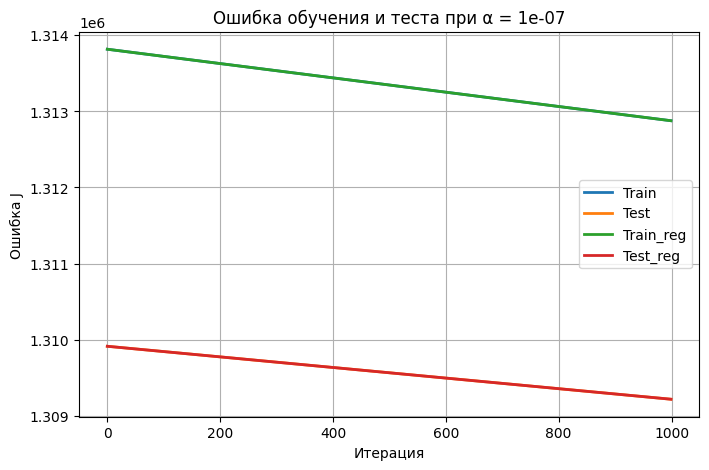

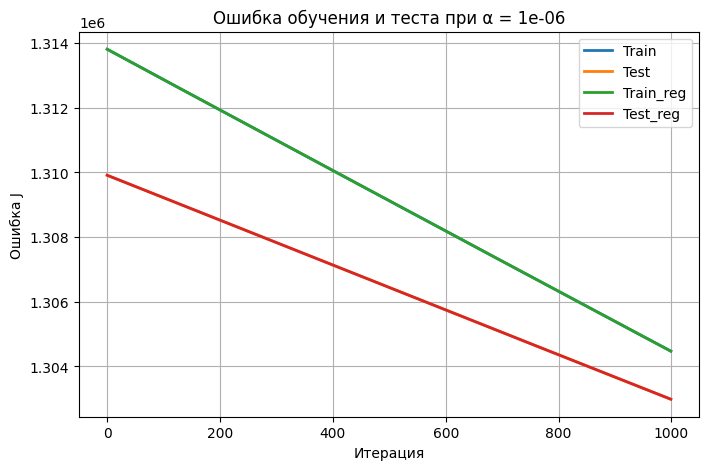

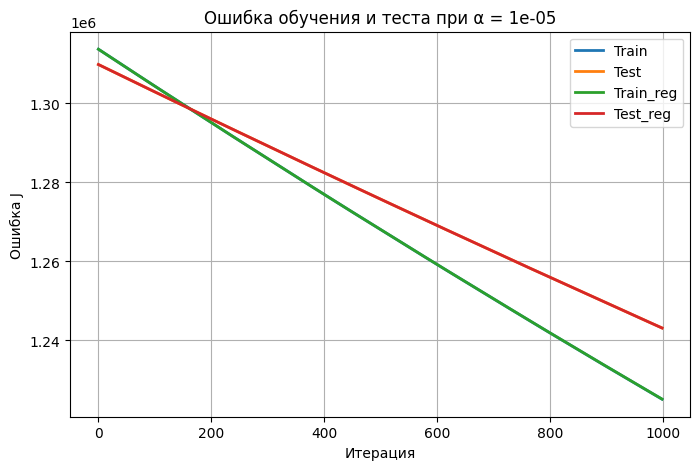

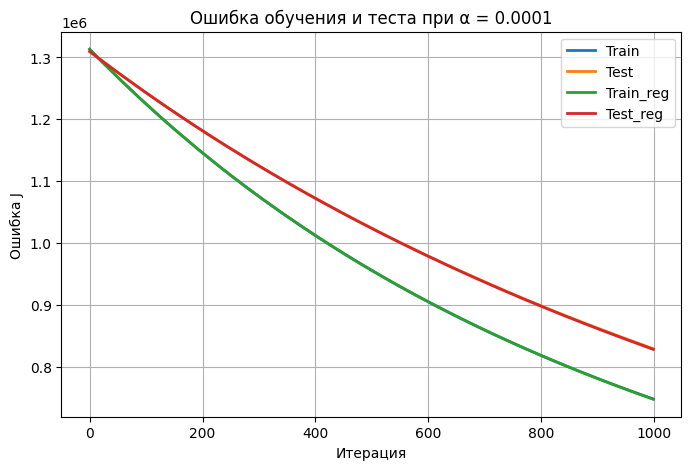

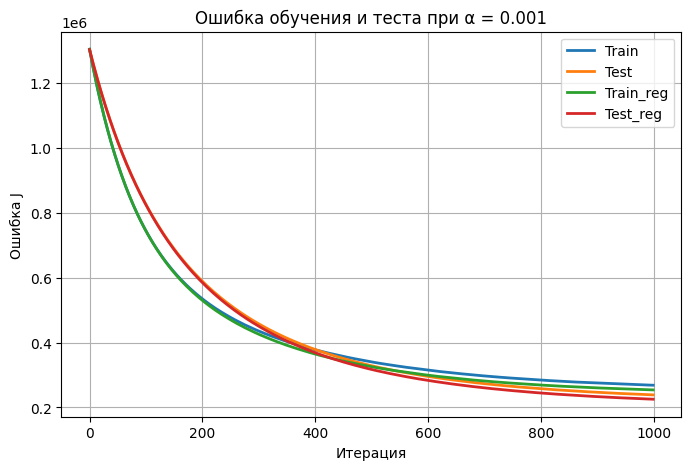

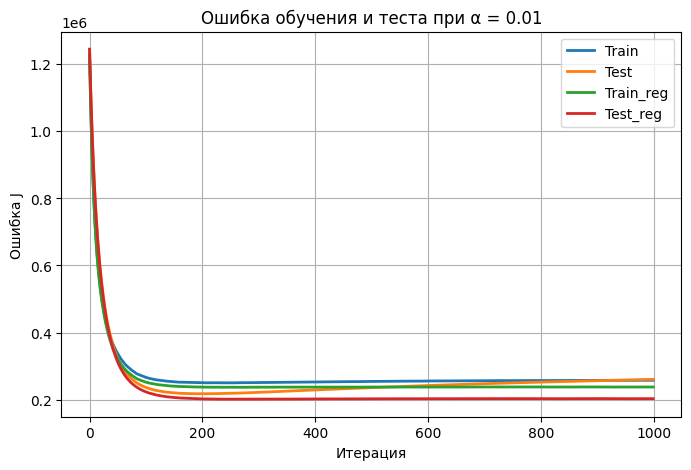

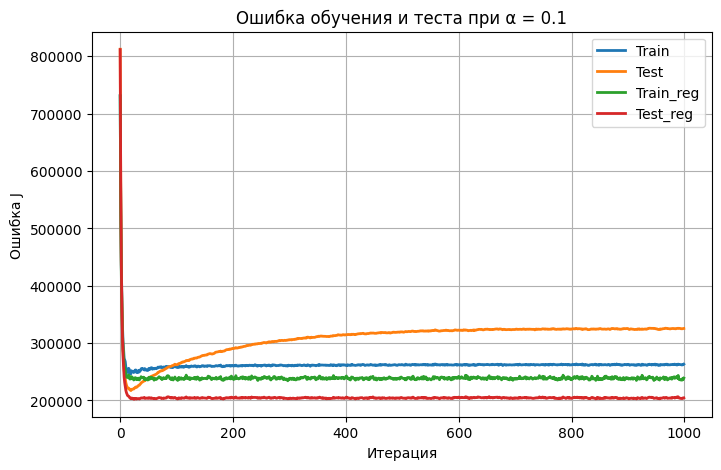

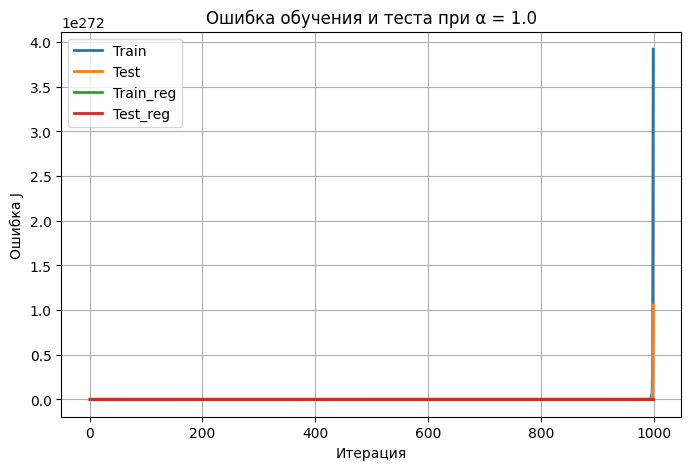

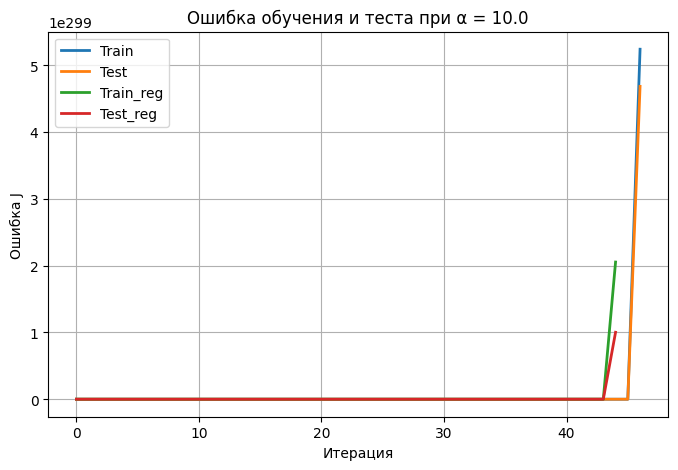

In [239]:
#Разбиение на train и test

data = data_frame.values
x1 = data[:, 0]
x2 = data[:, 1]
y = data[:, 2]

x3 = x1 + x2
x4 = x1 * x2

data = np.column_stack((x1, x2, x3, x4, y))
np.random.shuffle(data)
data_train, data_test = np.split(data, [int(0.5 * len(data))])

#Стандартизация

mean_dev = np.mean(data_train[:, :-1], axis=0)
std_dev = np.std(data_train[:, :-1], axis=0)

def standard(data_to_std, mean_dev, std_dev):
  data_to_std[:] = (data_to_std - mean_dev)/std_dev

standard(data_train[:,:-1], mean_dev, std_dev)
standard(data_test[:,:-1], mean_dev, std_dev)

data_train = np.insert(data_train, 0, 1, axis=1)
data_test = np.insert(data_test, 0, 1, axis=1)



batch_size: int = 8
lambd: float =  1
epoch_num = 1000
thetas_base = np.random.rand(5,1)
alphas = np.logspace(-7, 1, num=9, base=10)
history = {}

learn_n_vis(thetas_base, epoch_num, data_train, data_test, lambd)

/tmp/ipython-input-3196741218.py:12: RuntimeWarning: overflow encountered in square
  return ((h - y) ** 2).mean() #+ (lambd / (2 * m)) * np.sum(thetas[1:] ** 2)
/tmp/ipython-input-3196741218.py:5: RuntimeWarning: overflow encountered in square
  return ((h-y)**2).mean()
/tmp/ipython-input-3196741218.py:16: RuntimeWarning: overflow encountered in matmul
  grad = (xs.T @ (h - y)) / m
/tmp/ipython-input-3196741218.py:2: RuntimeWarning: invalid value encountered in matmul
  return xs @ thetas
/tmp/ipython-input-3196741218.py:2: RuntimeWarning: overflow encountered in matmul
  return xs @ thetas
/tmp/ipython-input-3196741218.py:16: RuntimeWarning: invalid value encountered in matmul
  grad = (xs.T @ (h - y)) / m
/tmp/ipython-input-3196741218.py:8: RuntimeWarning: overflow encountered in matmul
  return (xs.T @ (h-y))/len(xs)
/tmp/ipython-input-3196741218.py:68: RuntimeWarning: overflow encountered in multiply
  thetas_reg = thetas_reg - alpha*reg_grad
/tmp/ipython-input-3196741218.py:8: Ru

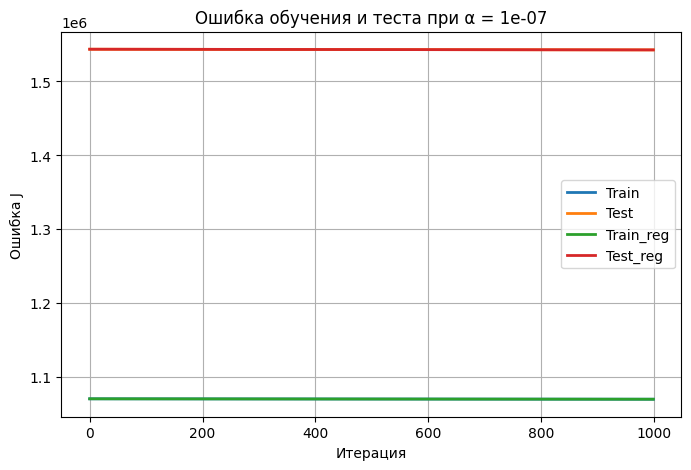

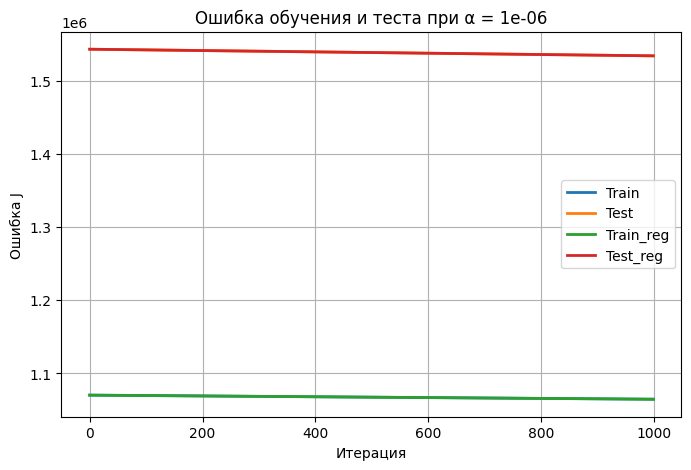

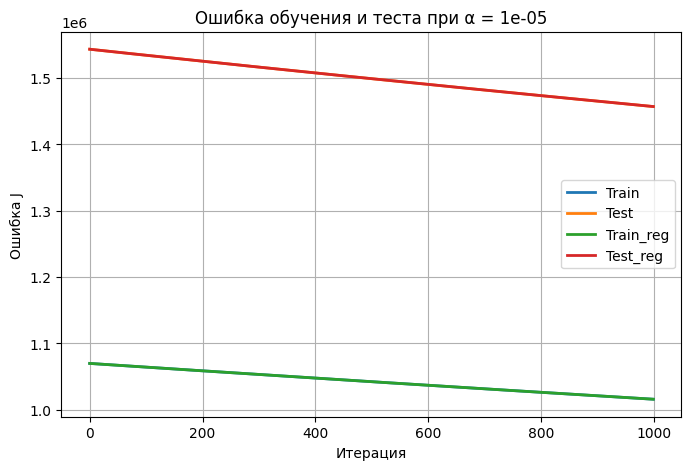

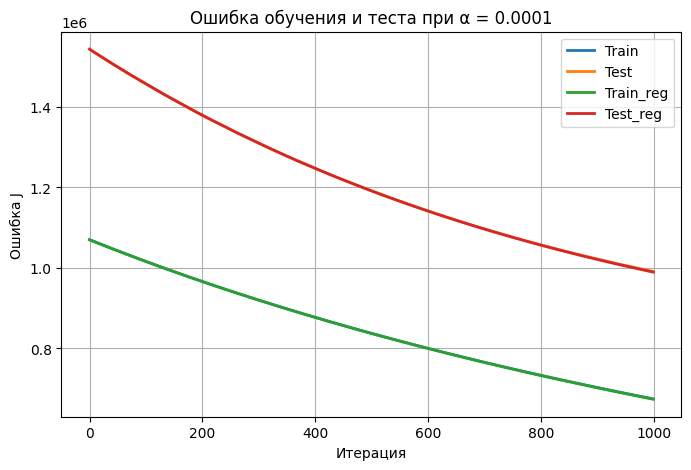

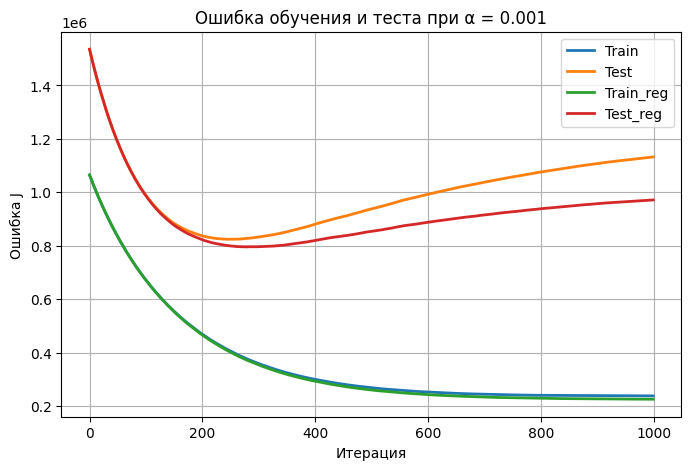

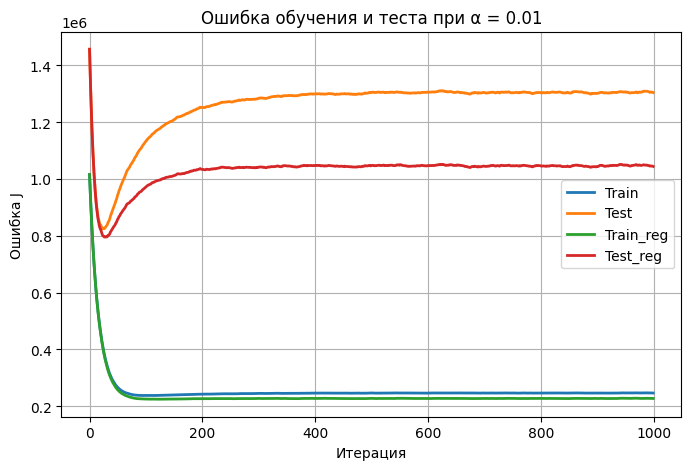

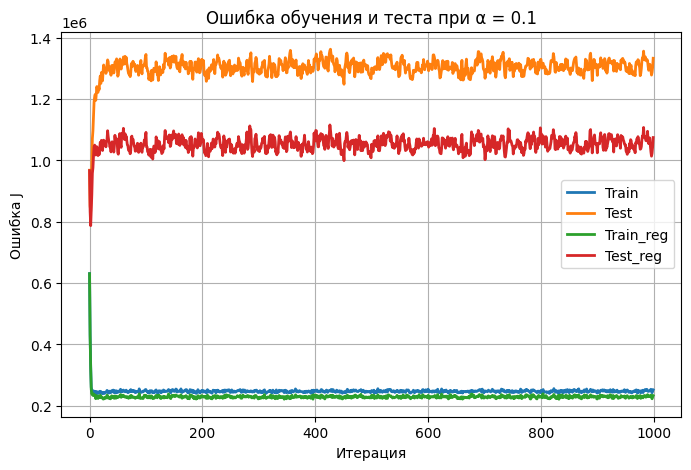

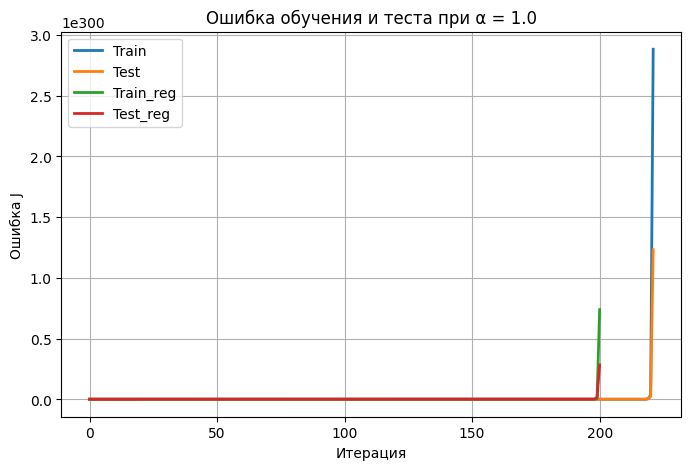

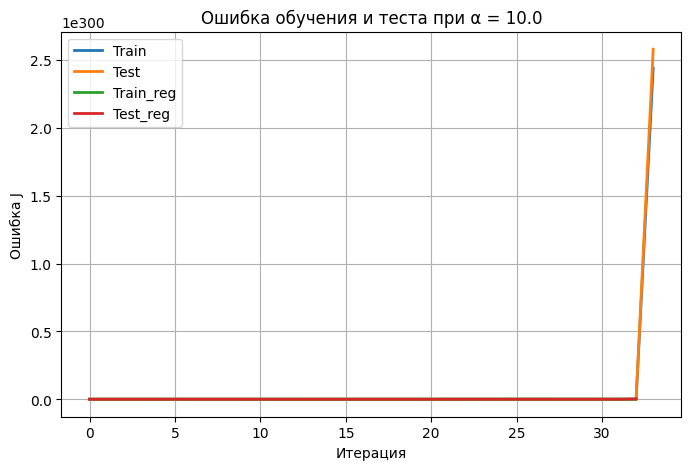

In [240]:


data = data_frame.values
x1 = data[:, 0]
x2 = data[:, 1]
y = data[:, 2]

x3 = x1 + x2
x4 = x1 * x2
x5 = np.power(x1, 2)
x6 = np.sin(x1)

data = np.column_stack((x1, x2, x3, x4,x5, x6, y))
np.random.shuffle(data)
data_train, data_test = np.split(data, [int(0.5 * len(data))])

#Стандартизация

mean_dev = np.mean(data_train[:, :-1], axis=0)
std_dev = np.std(data_train[:, :-1], axis=0)

def standard(data_to_std, mean_dev, std_dev):
  data_to_std[:] = (data_to_std - mean_dev)/std_dev

standard(data_train[:,:-1], mean_dev, std_dev)
standard(data_test[:,:-1], mean_dev, std_dev)

data_train = np.insert(data_train, 0, 1, axis=1)
data_test = np.insert(data_test, 0, 1, axis=1)



batch_size: int = 8
lambd: float =  1
epoch_num = 1000
thetas_base = np.random.rand(7,1)
alphas = np.logspace(-7, 1, num=9, base=10)
history = {}

learn_n_vis(thetas_base, epoch_num, data_train, data_test, lambd)